In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

file_path = '/Users/hannasharifi/Downloads/netflix_data.csv'  

data = pd.read_csv(file_path)

conn = sqlite3.connect('netflix_data.db')

data.to_sql('netflix_data', conn, if_exists='replace', index=False)

query = "SELECT * FROM netflix_data LIMIT 5"
query_result = pd.read_sql(query, conn)

print(query_result)

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water             None   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans             None   
4      s5  TV Show           Kota Factory             None   

                                                cast        country  \
0                                               None  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...           None   
3                                               None           None   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [2]:
missing_values = data.isnull().sum()
print(missing_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [3]:
print(data.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [4]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['country'] = data['country'].fillna('Unknown Country')
data['director'] = data['director'].fillna('Unknown Director')
data['cast'] = data['cast'].fillna('Unknown cast')
data['duration'] = data['duration'].fillna('Unknown Duration')
data['rating'] = data['rating'].fillna('Unknown Rating')

data.dropna(subset=['title', 'release_year'], inplace=True)

print(data.head())

  show_id     type                  title          director  \
0      s1    Movie   Dick Johnson Is Dead   Kirsten Johnson   
1      s2  TV Show          Blood & Water  Unknown Director   
2      s3  TV Show              Ganglands   Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans  Unknown Director   
4      s5  TV Show           Kota Factory  Unknown Director   

                                                cast          country  \
0                                       Unknown cast    United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...     South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  Unknown Country   
3                                       Unknown cast  Unknown Country   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...            India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 

In [5]:
query = """
SELECT type, COUNT(*) as count
FROM netflix_data
GROUP BY type;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

      type  count
0    Movie   6131
1  TV Show   2676


In [6]:
query = """SELECT country, COUNT(*) as count
FROM netflix_data
WHERE country != 'Unknown Country'
GROUP BY country
ORDER BY count DESC
LIMIT 10;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

          country  count
0   United States   2818
1           India    972
2  United Kingdom    419
3           Japan    245
4     South Korea    199
5          Canada    181
6           Spain    145
7          France    124
8          Mexico    110
9           Egypt    106


In [7]:
query = """SELECT rating, COUNT(*) as count
FROM netflix_data
GROUP BY rating
ORDER BY count DESC;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

      rating  count
0      TV-MA   3207
1      TV-14   2160
2      TV-PG    863
3          R    799
4      PG-13    490
5      TV-Y7    334
6       TV-Y    307
7         PG    287
8       TV-G    220
9         NR     80
10         G     41
11  TV-Y7-FV      6
12      None      4
13        UR      3
14     NC-17      3
15    84 min      1
16    74 min      1
17    66 min      1


In [8]:
query = """SELECT type, release_year, COUNT(*) AS count
FROM netflix_data
GROUP BY type, release_year
ORDER BY release_year DESC, type
LIMIT 20;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

       type  release_year  count
0     Movie          2021    277
1   TV Show          2021    315
2     Movie          2020    517
3   TV Show          2020    436
4     Movie          2019    633
5   TV Show          2019    397
6     Movie          2018    767
7   TV Show          2018    380
8     Movie          2017    767
9   TV Show          2017    265
10    Movie          2016    658
11  TV Show          2016    244
12    Movie          2015    398
13  TV Show          2015    162
14    Movie          2014    264
15  TV Show          2014     88
16    Movie          2013    225
17  TV Show          2013     63
18    Movie          2012    173
19  TV Show          2012     64


In [9]:
query = """SELECT rating, AVG(CAST(SUBSTR(duration, 1, INSTR(duration, ' ') - 1) AS INTEGER)) AS average_duration
FROM netflix_data
WHERE type = 'Movie'
GROUP BY rating
ORDER BY average_duration DESC;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

      rating  average_duration
0      NC-17        125.000000
1      TV-14        110.290820
2      PG-13        108.330612
3          R        106.720201
4         UR        106.333333
5         PG         98.282230
6      TV-MA         95.889913
7      TV-PG         94.851852
8         NR         94.533333
9          G         90.268293
10      TV-G         79.666667
11      None         76.000000
12  TV-Y7-FV         68.400000
13     TV-Y7         66.287770
14      TV-Y         48.114504
15    84 min               NaN
16    74 min               NaN
17    66 min               NaN


In [10]:
query = """SELECT listed_in, COUNT(*) AS count
FROM netflix_data
GROUP BY listed_in
ORDER BY count DESC
LIMIT 10;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

                                          listed_in  count
0                      Dramas, International Movies    362
1                                     Documentaries    359
2                                   Stand-Up Comedy    334
3            Comedies, Dramas, International Movies    274
4  Dramas, Independent Movies, International Movies    252
5                                          Kids' TV    220
6                          Children & Family Movies    215
7                Children & Family Movies, Comedies    201
8               Documentaries, International Movies    186
9     Dramas, International Movies, Romantic Movies    180


In [11]:
query = """SELECT director, COUNT(*) AS count
FROM netflix_data
WHERE type = 'Movie' AND director != 'Unknown director'
GROUP BY director
ORDER BY count DESC
LIMIT 10;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

                 director  count
0           Rajiv Chilaka     19
1  Raúl Campos, Jan Suter     18
2             Suhas Kadav     16
3            Marcus Raboy     15
4               Jay Karas     14
5     Cathy Garcia-Molina     13
6         Youssef Chahine     12
7         Martin Scorsese     12
8             Jay Chapman     12
9        Steven Spielberg     11


In [12]:
query = """SELECT duration, COUNT(*) AS count
FROM netflix_data
WHERE type = 'TV Show'
GROUP BY duration
ORDER BY count DESC;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

      duration  count
0     1 Season   1793
1    2 Seasons    425
2    3 Seasons    199
3    4 Seasons     95
4    5 Seasons     65
5    6 Seasons     33
6    7 Seasons     23
7    8 Seasons     17
8    9 Seasons      9
9   10 Seasons      7
10  13 Seasons      3
11  15 Seasons      2
12  12 Seasons      2
13  11 Seasons      2
14  17 Seasons      1


In [13]:
query = """SELECT title, country
FROM netflix_data
WHERE country LIKE '%,%' 
ORDER BY country
LIMIT 30;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

                                  title  \
0                       Eyes of a Thief   
1                                  D.P.   
2                      A Sort of Family   
3                                  Fuga   
4                      The Desert Bride   
5                                Lusers   
6                             Invisible   
7                     Temporada de Caza   
8                        Food on the Go   
9                           Tango Feroz   
10                            Underdogs   
11                      Vientos de agua   
12                      Mi Obra Maestra   
13                              Perdida   
14                   Despido Procedente   
15            The Distinguished Citizen   
16                           Black Snow   
17                      Blood Will Tell   
18                   Maradona in Mexico   
19              El Pepe, a Supreme Life   
20                     The Lost Brother   
21  El patrón, radiografía de un crimen   
22         

In [14]:
query = """SELECT LOWER(SUBSTR(title, INSTR(title, ' ') + 1)) AS word, COUNT(*) AS count
FROM netflix_data
GROUP BY word
ORDER BY count DESC
LIMIT 10;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

    word  count
0      2     23
1   girl     17
2   love     15
3  house     13
4    man     12
5  girls     12
6     up     11
7   game     11
8   time     10
9    day     10


In [15]:
query = """SELECT release_year, COUNT(*) AS count
FROM netflix_data
WHERE listed_in LIKE '%Action%' 
GROUP BY release_year
ORDER BY release_year DESC;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

    release_year  count
0           2021     65
1           2020     78
2           2019     79
3           2018    109
4           2017     97
5           2016     89
6           2015     58
7           2014     32
8           2013     31
9           2012     30
10          2011     27
11          2010     29
12          2009     22
13          2008     29
14          2007     16
15          2006     12
16          2005     13
17          2004     18
18          2003     16
19          2002     15
20          2001     12
21          2000     10
22          1999     11
23          1998      5
24          1997     11
25          1996      3
26          1995      8
27          1994      8
28          1993      7
29          1992      6
30          1991      1
31          1990      7
32          1989      4
33          1988      3
34          1987      3
35          1986      6
36          1985      2
37          1984      6
38          1983      4
39          1982      5
40          1981

In [16]:
query = """SELECT title, COUNT(country) AS country_count
FROM (
  SELECT title, country
  FROM netflix_data
  WHERE country != 'Unknown'
  GROUP BY title, country
)
GROUP BY title
ORDER BY country_count DESC
LIMIT 10;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

                                 title  country_count
0                              반드시 잡는다              1
1                                 마녀사냥              1
2                             忍者ハットリくん              1
3                 ​​Kuch Bheege Alfaaz              1
4  ​SAINT SEIYA: Knights of the Zodiac              1
5                          ​Mayurakshi              1
6                   ​Maj Rati ​​Keteki              1
7                         ​Goli Soda 2              1
8                            يوم الدين              1
9                            الف مبروك              1


In [17]:
query = """SELECT 
  CASE 
    WHEN CAST(SUBSTR(duration, 1, INSTR(duration, ' ') - 1) AS INTEGER) <= 90 THEN 'Under 90 minutes'
    WHEN CAST(SUBSTR(duration, 1, INSTR(duration, ' ') - 1) AS INTEGER) BETWEEN 91 AND 120 THEN '91-120 minutes'
    WHEN CAST(SUBSTR(duration, 1, INSTR(duration, ' ') - 1) AS INTEGER) BETWEEN 121 AND 150 THEN '121-150 minutes'
    ELSE 'Over 150 minutes'
  END AS duration_range, 
  COUNT(*) AS count
FROM netflix_data
WHERE type = 'Movie'
GROUP BY duration_range
ORDER BY count DESC;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

     duration_range  count
0    91-120 minutes   2996
1  Under 90 minutes   1990
2   121-150 minutes    897
3  Over 150 minutes    248


In [18]:
query = """SELECT release_year, COUNT(*) AS count
FROM netflix_data
WHERE type = 'TV Show'
GROUP BY release_year
ORDER BY count DESC
LIMIT 10;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

   release_year  count
0          2020    436
1          2019    397
2          2018    380
3          2021    315
4          2017    265
5          2016    244
6          2015    162
7          2014     88
8          2012     64
9          2013     63


In [19]:
query = """SELECT release_year, COUNT(*) AS count
FROM netflix_data
WHERE type = 'TV Show'
GROUP BY release_year
ORDER BY count DESC
LIMIT 10;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

   release_year  count
0          2020    436
1          2019    397
2          2018    380
3          2021    315
4          2017    265
5          2016    244
6          2015    162
7          2014     88
8          2012     64
9          2013     63


In [20]:
query = """SELECT 
  strftime('%Y', date_added) AS year_added, 
  type, 
  COUNT(*) AS count
FROM netflix_data
WHERE date_added IS NOT NULL
GROUP BY year_added, type
ORDER BY year_added ASC;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

  year_added     type  count
0       None    Movie   6131
1       None  TV Show   2666


In [21]:
query = """SELECT date_added FROM netflix_data LIMIT 10;
"""

nd = pd.read_sql_query(query, conn)

print(nd)

           date_added
0  September 25, 2021
1  September 24, 2021
2  September 24, 2021
3  September 24, 2021
4  September 24, 2021
5  September 24, 2021
6  September 24, 2021
7  September 24, 2021
8  September 24, 2021
9  September 24, 2021


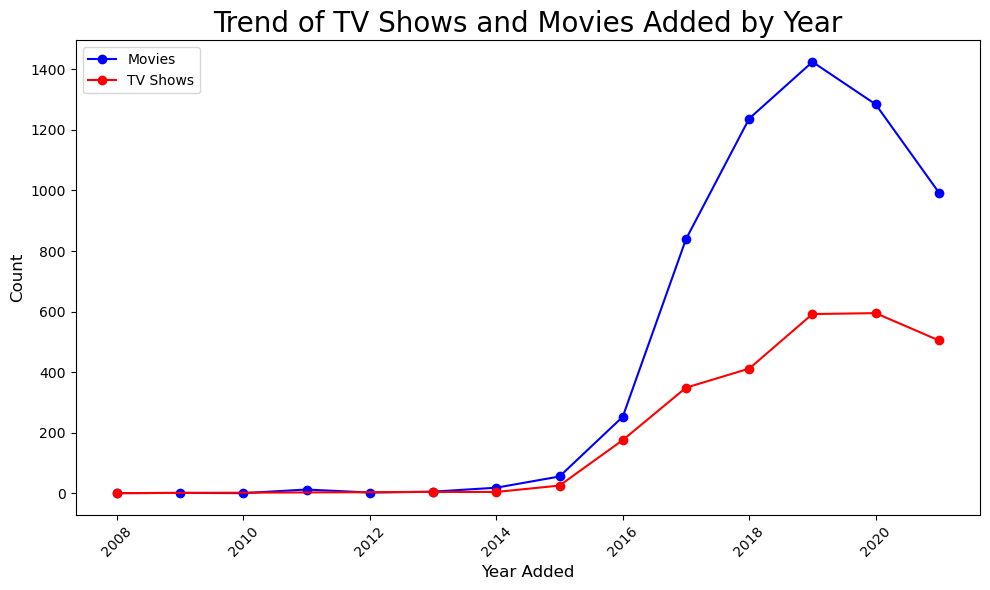

In [22]:
query_movies_tv_shows_year_added = """
SELECT 
SUBSTR(date_added, -4) AS year_added, 
type, 
COUNT(*) AS count
FROM netflix_data
WHERE date_added IS NOT NULL
GROUP BY year_added, type
ORDER BY year_added ASC;
"""

nd = pd.read_sql_query(query_movies_tv_shows_year_added, conn)


nd['year_added'] = nd['year_added'].astype(int)

movies = nd[nd['type'] == 'Movie'].sort_values('year_added')
tv_shows = nd[nd['type'] == 'TV Show'].sort_values('year_added')

plt.figure(figsize=(10, 6)) 

plt.plot(movies['year_added'], movies['count'], label='Movies', marker='o', linestyle='-', color='blue')
plt.plot(tv_shows['year_added'], tv_shows['count'], label='TV Shows', marker='o', linestyle='-', color='red')

plt.title('Trend of TV Shows and Movies Added by Year', fontsize=20)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  
plt.legend()

plt.tight_layout()  
plt.show()

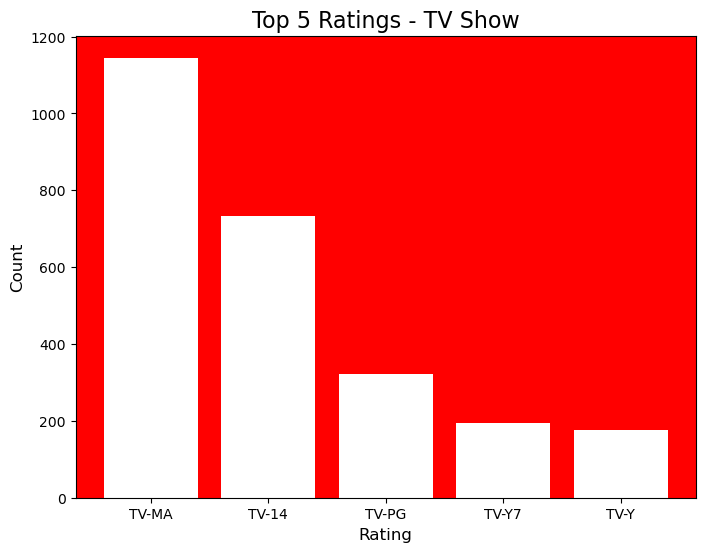

In [23]:
query_top_5_ratings_tv_show = """
SELECT rating, COUNT(*) AS count
FROM netflix_data
WHERE type = 'TV Show' AND rating IS NOT NULL
GROUP BY rating
ORDER BY count DESC
LIMIT 5;
"""

nd = pd.read_sql_query(query_top_5_ratings_tv_show, conn)

plt.figure(figsize=(8, 6))
plt.bar(nd['rating'], nd['count'], color='white')  

plt.title('Top 5 Ratings - TV Show', fontsize=16, color='black')
plt.xlabel('Rating', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')

plt.tick_params(colors='black')
plt.gca().set_facecolor('red')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')

plt.show()

  rating  count
0  TV-MA   2062
1  TV-14   1427
2      R    797
3  TV-PG    540
4  PG-13    490


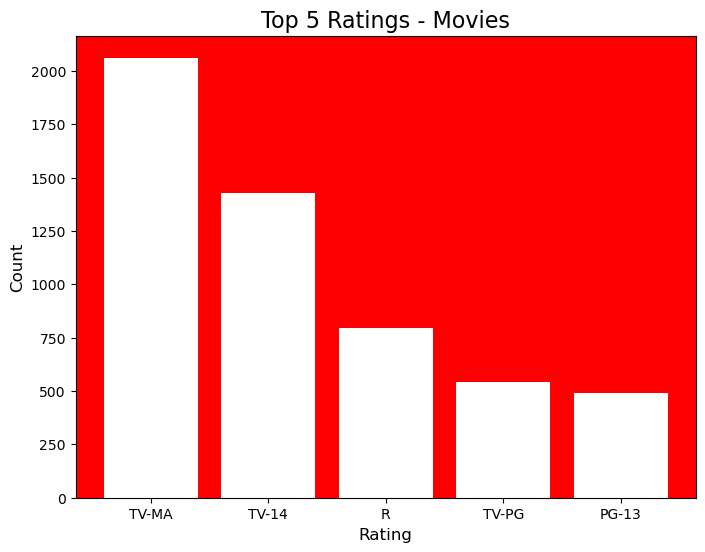

In [24]:
query_top_5_ratings_movie = """
SELECT rating, COUNT(*) AS count
FROM netflix_data
WHERE type = 'Movie' AND rating IS NOT NULL
GROUP BY rating
ORDER BY count DESC
LIMIT 5;
"""

nd = pd.read_sql_query(query_top_5_ratings_movie, conn)

print(nd)

plt.figure(figsize=(8, 6))
plt.bar(nd['rating'], nd['count'], color='white')  

plt.title('Top 5 Ratings - Movies', fontsize=16, color='black')
plt.xlabel('Rating', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')

plt.tick_params(colors='black')
plt.gca().set_facecolor('red')  
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')

plt.show()

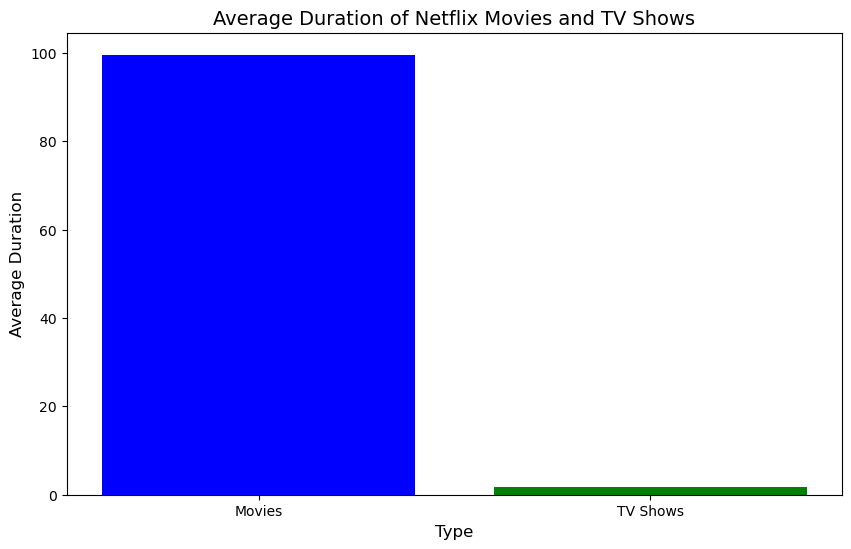

In [25]:
query_movies = """
SELECT AVG(CAST(SUBSTR(duration, 1, INSTR(duration, ' ') - 1) AS INTEGER)) AS avg_movie_duration
FROM netflix_data
WHERE type = 'Movie';
"""

query_tv_shows = """
SELECT AVG(CAST(SUBSTR(duration, 1, INSTR(duration, ' ') - 1) AS INTEGER)) AS avg_tv_show_duration
FROM netflix_data
WHERE type = 'TV Show';
"""

avg_movie_duration = pd.read_sql_query(query_movies, conn)
avg_tv_show_duration = pd.read_sql_query(query_tv_shows, conn)


avg_movie_duration_value = avg_movie_duration.iloc[0]['avg_movie_duration']
avg_tv_show_duration_value = avg_tv_show_duration.iloc[0]['avg_tv_show_duration']

plt.figure(figsize=(10, 6))
plt.bar(['Movies', 'TV Shows'], [avg_movie_duration_value, avg_tv_show_duration_value], color=['blue', 'green'])

plt.title('Average Duration of Netflix Movies and TV Shows', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Average Duration', fontsize=12)
plt.show()


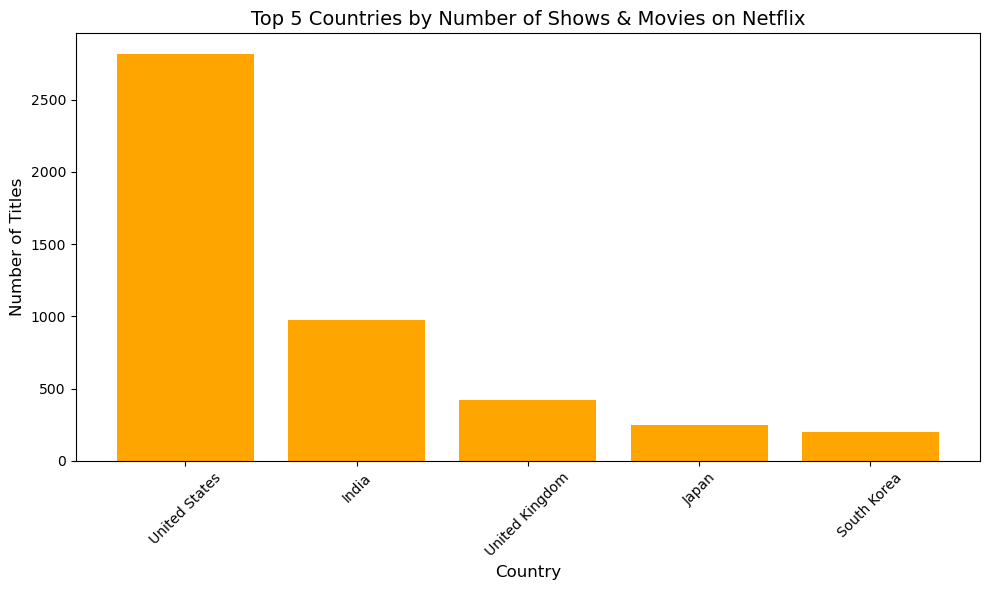

In [26]:
query_top_5_countries = """
SELECT country, COUNT(*) AS number_of_titles
FROM netflix_data
WHERE country IS NOT NULL AND country != ''
GROUP BY country
ORDER BY number_of_titles DESC
LIMIT 5;
"""

top_countries_df = pd.read_sql_query(query_top_5_countries, conn)

plt.figure(figsize=(10, 6))
plt.bar(top_countries_df['country'], top_countries_df['number_of_titles'], color='orange')

plt.title('Top 5 Countries by Number of Shows & Movies on Netflix', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


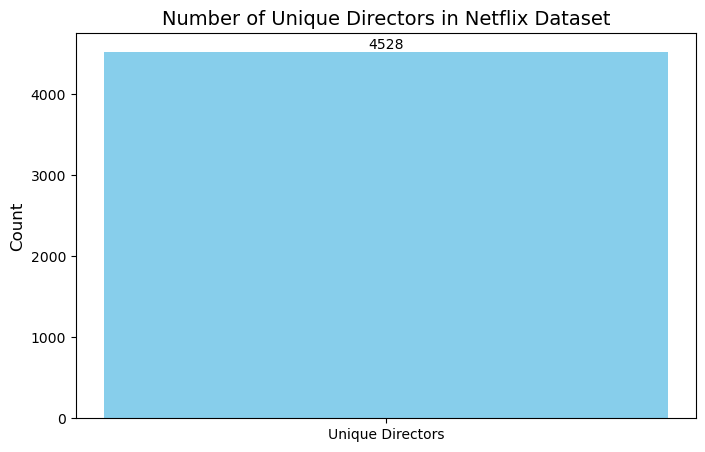

In [27]:
query_total_directors = """
SELECT COUNT(DISTINCT director) AS unique_directors_count
FROM netflix_data
WHERE director <> 'Unknown' AND director IS NOT NULL;
"""

unique_directors_count = pd.read_sql_query(query_total_directors, conn).iloc[0]['unique_directors_count']


plt.figure(figsize=(8, 5))
plt.bar(['Unique Directors'], [unique_directors_count], color='skyblue')

plt.text('Unique Directors', unique_directors_count, f'{unique_directors_count}', ha='center', va='bottom')

plt.title('Number of Unique Directors in Netflix Dataset', fontsize=14)
plt.ylabel('Count', fontsize=12)

plt.show()

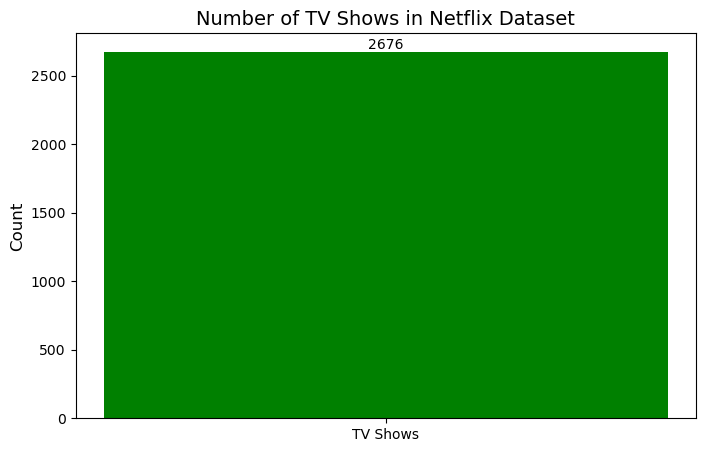

In [28]:
query_total_tv_shows = """
SELECT COUNT(*) AS number_of_tv_shows
FROM netflix_data
WHERE type = 'TV Show';
"""

number_of_tv_shows = pd.read_sql_query(query_total_tv_shows, conn).iloc[0]['number_of_tv_shows']

plt.figure(figsize=(8, 5))
plt.bar(['TV Shows'], [number_of_tv_shows], color='green')

plt.text('TV Shows', number_of_tv_shows, f'{number_of_tv_shows}', ha='center', va='bottom')

plt.title('Number of TV Shows in Netflix Dataset', fontsize=14)
plt.ylabel('Count', fontsize=12)

plt.show()

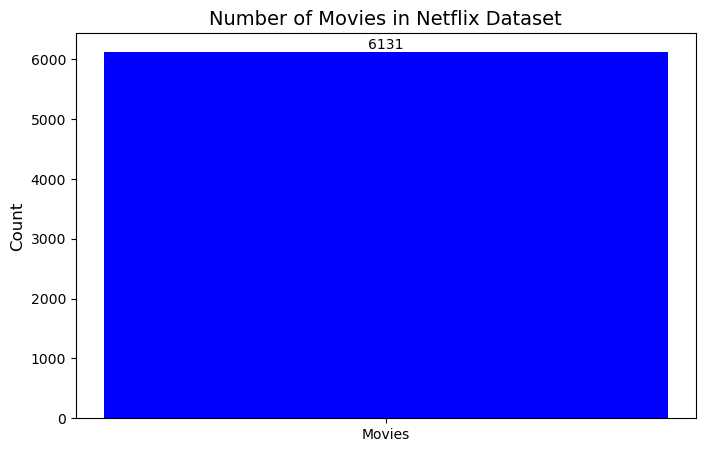

In [29]:
query_total_movies = """
SELECT COUNT(*) AS number_of_movies
FROM netflix_data
WHERE type = 'Movie';
"""

number_of_movies = pd.read_sql_query(query_total_movies, conn).iloc[0]['number_of_movies']

plt.figure(figsize=(8, 5))
plt.bar(['Movies'], [number_of_movies], color='blue')

plt.text('Movies', number_of_movies, str(number_of_movies), ha='center', va='bottom')

plt.title('Number of Movies in Netflix Dataset', fontsize=14)
plt.ylabel('Count', fontsize=12)

plt.show()

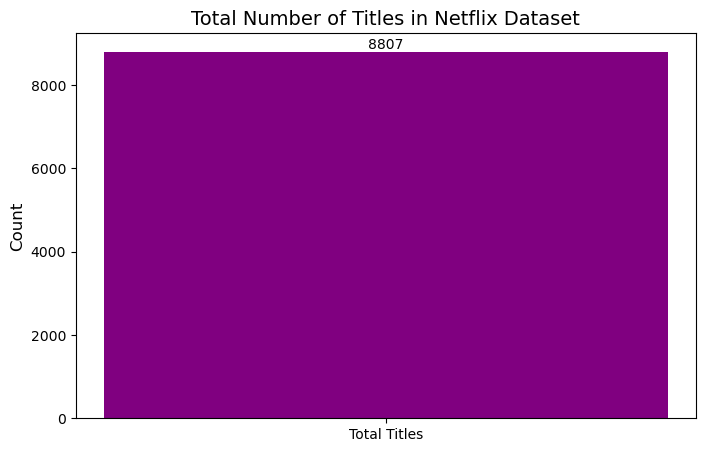

In [30]:
query_total_titles = """
SELECT COUNT(*) AS number_of_total_titles
FROM netflix_data;
"""

number_of_total_titles = pd.read_sql_query(query_total_titles, conn).iloc[0]['number_of_total_titles']

plt.figure(figsize=(8, 5))
plt.bar(['Total Titles'], [number_of_total_titles], color='purple')

plt.text('Total Titles', number_of_total_titles, str(number_of_total_titles), ha='center', va='bottom')

plt.title('Total Number of Titles in Netflix Dataset', fontsize=14)
plt.ylabel('Count', fontsize=12)

plt.show()

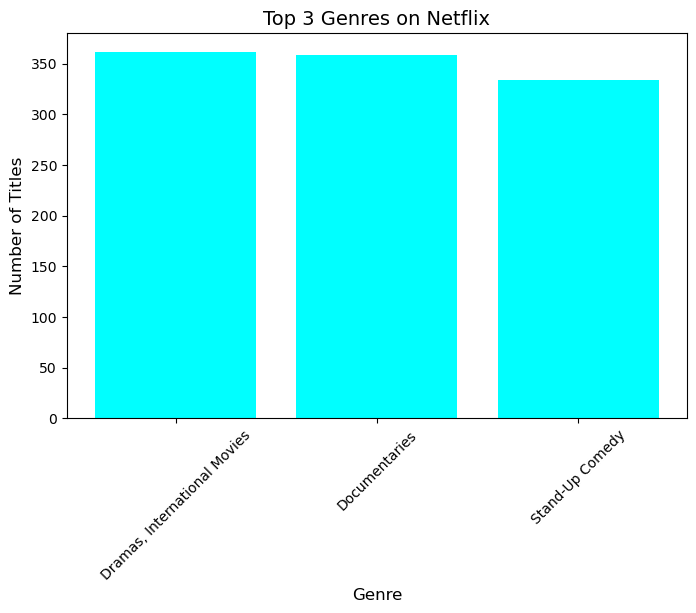

In [31]:
query_genres = """
SELECT listed_in AS genre, COUNT(*) AS count
FROM netflix_data
GROUP BY genre
ORDER BY count DESC
LIMIT 3;
"""

df_genres = pd.read_sql_query(query_genres, conn)

plt.figure(figsize=(8, 5))
plt.bar(df_genres['genre'], df_genres['count'], color='cyan')
plt.title('Top 3 Genres on Netflix', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.show()

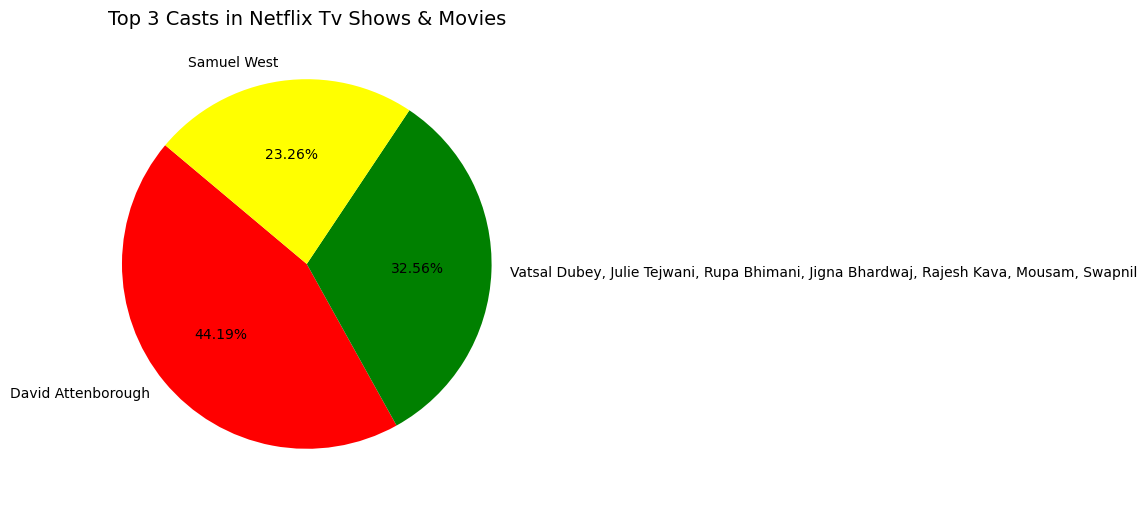

In [32]:
query_casts = """
SELECT "cast", COUNT(*) AS count
FROM netflix_data
WHERE "cast" != 'Unknown cast' AND "cast" IS NOT NULL
GROUP BY "cast"
ORDER BY count DESC
LIMIT 3;
"""

df_casts = pd.read_sql_query(query_casts, conn)


plt.figure(figsize=(8, 6))
plt.pie(df_casts['count'], labels=df_casts['cast'], autopct='%1.2f%%', startangle=140, colors=['red', 'green', 'yellow'])
plt.title('Top 3 Casts in Netflix Tv Shows & Movies', fontsize=14)
plt.show()